In [12]:
################################################
## =========== TW.sol new! 1105 ============== #
## ======= renew .WTH file (Xinwu) =========== #
################################################

library(dplyr)
library(stringr)
library(ggplot2)


In [13]:
Han546yield = read.table("OVERVIEW(TW.sol 1203new).txt", sep="\n")
TW.sol_10km = read.table("TW.sol_10km.txt",sep="\n")

In [14]:
## for ID and grids ###

n = nrow(TW.sol_10km)
datseq = seq(from=3, to=n, by=13)

part_of_TW.sol_10km = TW.sol_10km[datseq, ]
co = na.omit(as.numeric(unlist(strsplit(as.character(part_of_TW.sol_10km), " "))))
nn = which(co==-99)
co = co[-nn]
coords = data.frame(matrix(co, nrow=546, ncol=2, byrow = T))

datseq3 = seq(from=1, to=n, by=13)
ID_of_TW.sol_10km = TW.sol_10km[datseq3, ]
rr = unlist(strsplit(as.character(ID_of_TW.sol_10km), " "))

rr = rr[str_sub(rr, start = 1, end = 3)=="*TW"]
rrr = substr(rr, 2,11)
coordID = as.data.frame(cbind(rrr,coords)) 
colnames(coordID) = c("ID", "Latitude", "Longitude")

Warning message in na.omit(as.numeric(unlist(strsplit(as.character(part_of_TW.sol_10km), :
"強制變更過程中產生了 NA"


In [15]:
## for ID and yields ###

n = 546 # sol個數
datseq = seq(from=115, to=n*115+1, by=115)
Han546yield_y = Han546yield[datseq, ]
yield = na.omit(as.numeric(unlist(strsplit(
  as.character(Han546yield_y), " ")))) %>% as.numeric()

datseq2 = seq(from=3, to=n*115+1, by=115)
Han546yield_co = Han546yield[datseq2, ]

tm = unlist(strsplit(as.character(Han546yield_co), " "))

tm_546 = tm[str_sub(tm, start = 1, end = 2)=="TW"]
yield.ID_546 = as.data.frame(cbind(tm_546,yield)) 
colnames(yield.ID_546) = c("ID", "yield")
head(yield.ID_546)

Warning message in na.omit(as.numeric(unlist(strsplit(as.character(Han546yield_y), :
"強制變更過程中產生了 NA"


,ID,yield
,<fct>,<fct>
1,TW03437994,2667
2,TW03437995,1088
3,TW03442313,619
4,TW03442314,2366
5,TW03442315,2426
6,TW03442316,2187


In [16]:
final_Han546 = merge(coordID, yield.ID_546, by = "ID") %>% as.data.frame()

# write.table(final_Han546, "final_Han546.txt")


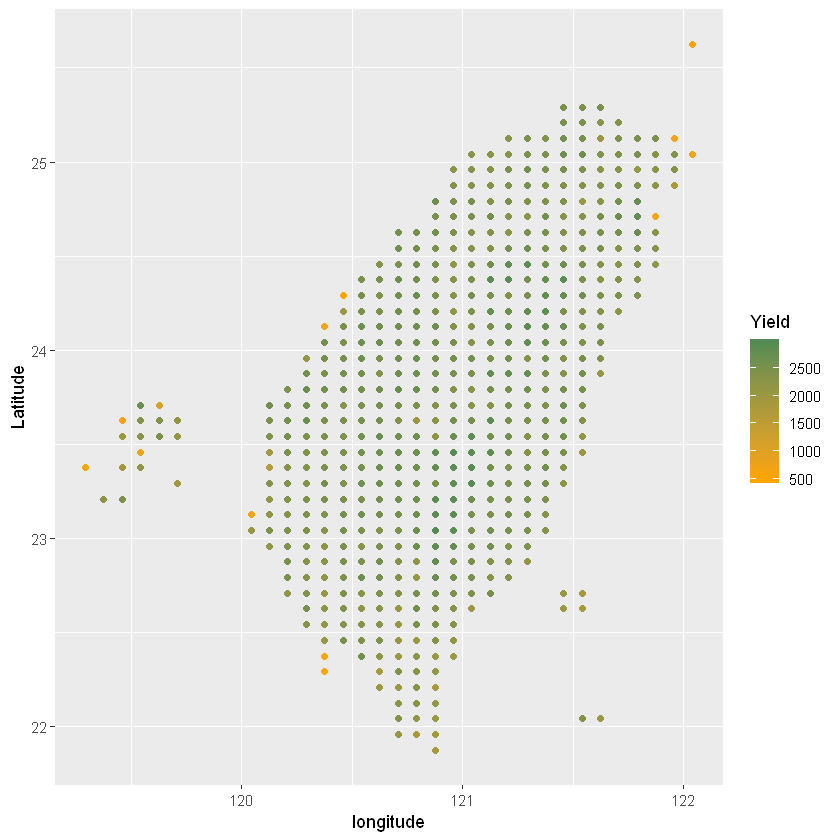

In [40]:
# final_Han546 = read.table("final_Han546.txt" , header = T)

# yield = final_Han546$yield
col = as.numeric(as.vector(final_Han546$yield))


# coord plot # 
ggplot(final_Han546, aes(x=Longitude,y=Latitude))+
  geom_point( aes(x=Longitude,y=Latitude, color = col))+
  scale_colour_gradient(low="orange", high = "palegreen4",name ="Yield")+
  labs(x = "longitude", y = "Latitude")
 

In [37]:
f = function(yield){yield/ max(as.numeric(final_Han546$yield))}
nor = sapply(yield, f)

nor_yield = as.data.frame(cbind(tm_546,yield,nor))
colnames(nor_yield) = c("ID", "yield", "normalized yield")
nor_final_Han546 = merge(coordID, nor_yield, by = "ID")

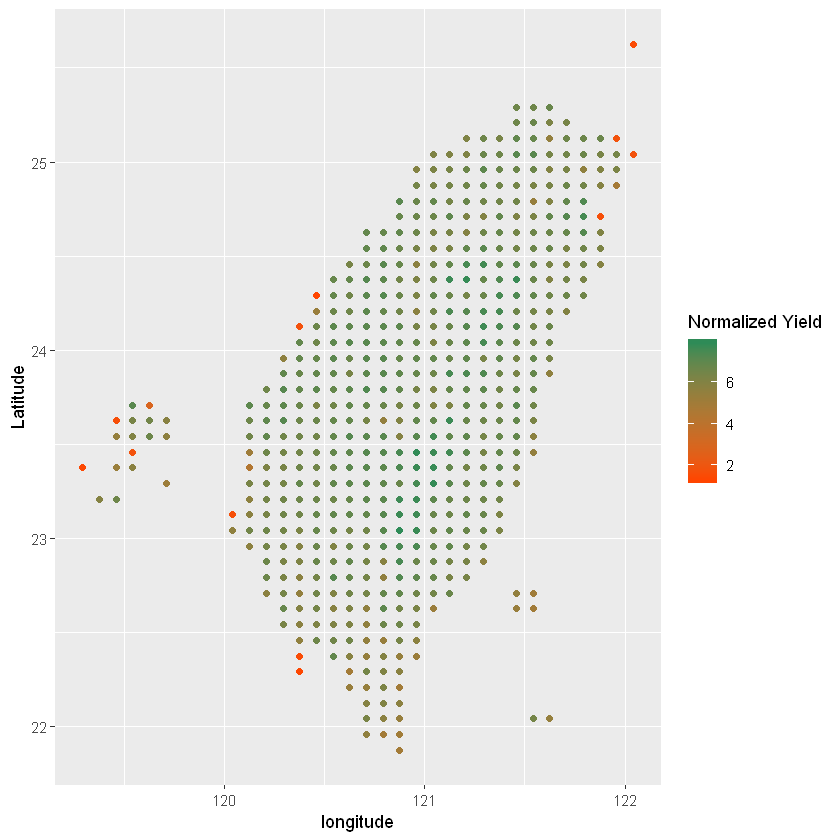

In [38]:
# plot normalized yield # 
col_nor = as.numeric(as.vector(nor_final_Han546$`normalized yield`))


ggplot(final_Han546, aes(x=Longitude,y=Latitude))+
  geom_point( aes(x=Longitude,y=Latitude, color = col_nor))+
  scale_colour_gradient(low="orangered", high = "seagreen4",name ="Normalized Yield")+
  labs(x = "longitude", y = "Latitude")

# =========== above are han154 plots =========== #